<a href="https://colab.research.google.com/github/DaniloCossioloDias/AtiviadesDataScience/blob/main/Steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este dataset é da Steam e contém informações detalhadas sobre jogos disponíveis na plataforma. Ele inclui dados como o nome do jogo, data de lançamento, desenvolvedor, publicador, plataformas suportadas (Windows, Mac, Linux), idade mínima recomendada, categorias e gêneros do jogo, além de tags populares associadas. Também apresenta métricas como o número de conquistas, avaliações positivas e negativas, tempo médio e mediano de jogo, faixa estimada de donos e o preço do jogo em dólares. Este conjunto de dados é útil para análises de mercado, identificação de tendências e estudo do comportamento dos jogadores na Steam.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('steam.csv')

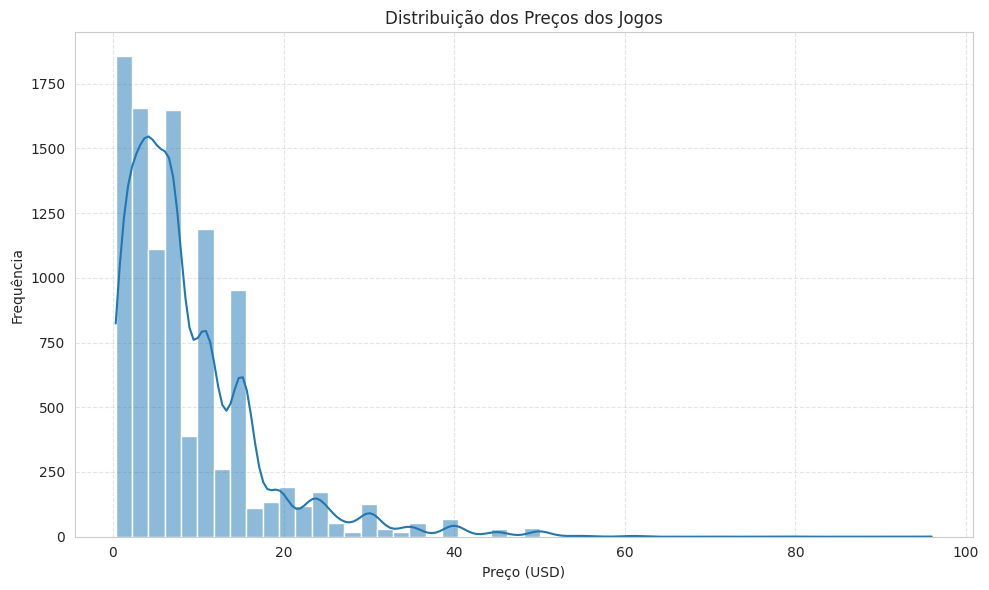

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] > 0]['price'], bins=50, kde=True, color='#1f77b4')
plt.title('Distribuição dos Preços dos Jogos')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Descrição: Este gráfico mostra a distribuição dos preços dos jogos (excluindo os gratuitos) no dataset.

Insights:

*   A maioria dos jogos tem preços baixos, concentrados na faixa de 0 a 20 dólares.
*   Existe uma queda acentuada no número de jogos à medida que o preço aumenta, indicando que jogos mais caros são menos comuns.
*   A curva KDE (Kernel Density Estimate) reforça que a densidade de preços é maior em valores baixos, com uma cauda longa para preços mais altos.



In [ ]:
import plotly.express as px

# Selecionar os 5 gêneros mais comuns
top_genres = df['genres'].str.split(';').explode().value_counts().head(5).index

# Criar uma coluna com o primeiro gênero listado
df['main_genre'] = df['genres'].str.split(';').str[0]

# Filtrar apenas os jogos pagos e gêneros no top 5
filtered_df = df[df['main_genre'].isin(top_genres) & (df['price'] > 0)]

# Gráfico boxplot com Plotly
fig = px.box(
    filtered_df,
    x='main_genre',
    y='price',
    color='main_genre',
    labels={'main_genre': 'Gênero', 'price': 'Preço (USD)'},
    title='Distribuição de Preços por Gênero (Top 5)',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    template='plotly_white',
    title_font_size=20,
    xaxis_title='Gênero',
    yaxis_title='Preço (USD)',
    showlegend=False,
    height=600,
    width=900
)

fig.show()


Como os preços dos jogos do Steam mudaram ao longo do tempo?

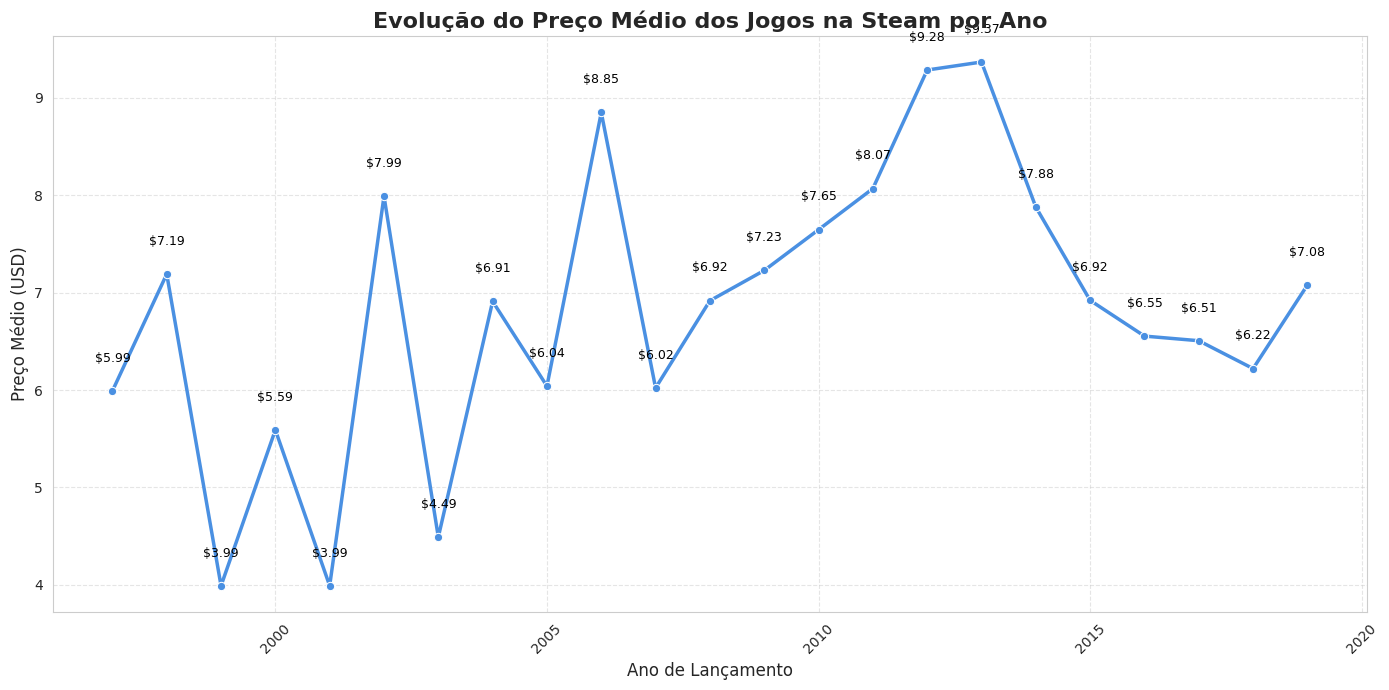

In [ ]:
# Estilo visual do Seaborn
sns.set_style("whitegrid")

# Paleta personalizada (tons de azul)
custom_color = "#4A90E2"

# Figura
plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    data=price_by_year,
    x='release_year',
    y='price',
    marker='o',
    linewidth=2.5,
    color=custom_color
)

# Adiciona os valores nos pontos
for i, row in price_by_year.iterrows():
    ax.text(row['release_year'], row['price'] + 0.3, f"${row['price']:.2f}",
            color='black', ha='center', fontsize=9)

plt.title('Evolução do Preço Médio dos Jogos na Steam por Ano', fontsize=16, weight='bold')
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


Picos (altas nos preços):

O maior preço médio foi em 2014, indicando um período em que os jogos lançados eram, em média, mais caros.

Período de Crescimento (2005–2014):

Entre 2005 e 2014, houve um crescimento consistente no preço médio dos jogos, atingindo o pico em 2014. Isso pode estar relacionado ao aumento da qualidade dos jogos, maior investimento em desenvolvimento e a popularização de jogos AAA (títulos de alto orçamento).

Queda após 2014: Após 2014, o preço médio começou a cair, chegando a $5,57 em 2018. Isso pode ser explicado por:

Aumento na quantidade de jogos independentes (Indie), que geralmente têm preços mais baixos.

As pontuações das avaliações diferem por gênero?

In [ ]:
import plotly.express as px

# Score de avaliação (entre 0 e 1)
df['rating_score'] = df['positive_ratings'] / (df['positive_ratings'] + df['negative_ratings'])

# Remover jogos sem avaliações
df = df.dropna(subset=['rating_score'])

# Remover jogos com menos de 50 avaliações totais
df = df[(df['positive_ratings'] + df['negative_ratings']) >= 50]

# Separar os gêneros
df['genres'] = df['genres'].fillna('')
df_genres = df.assign(genre=df['genres'].str.split(';|,')).explode('genre')

# Limpar espaços em branco
df_genres['genre'] = df_genres['genre'].str.strip()

# Remover entradas sem gênero
df_genres = df_genres[df_genres['genre'] != '']

# Agrupar por gênero e calcular média de rating
genre_score = df_genres.groupby('genre')['rating_score'].mean().reset_index()

# Top 15 gêneros com maior score médio
top_genres = genre_score.sort_values(by='rating_score', ascending=False).head(15)

# Gráfico interativo com Plotly
fig = px.bar(
    top_genres,
    x='rating_score',
    y='genre',
    orientation='h',
    color='rating_score',
    color_continuous_scale='Blues',
    labels={'rating_score': 'Score Médio de Avaliação', 'genre': 'Gênero'},
    title='Score Médio de Avaliação por Gênero de Jogo (Steam)'
)

fig.update_layout(
    xaxis=dict(range=[0.6, 1.0]),
    yaxis=dict(categoryorder='total ascending'),
    height=600,
    width=900,
    template='plotly_white',
    title_font_size=20
)

fig.show()


As pontuações das avaliações diferem por gênero?

Web Publishing lidera porque atende a um público de nicho com necessidades claras e objetivas, resultando em alta satisfação.

Early Access está em último porque jogos inacabados frequentemente frustram os jogadores, levando a avaliações negativas.

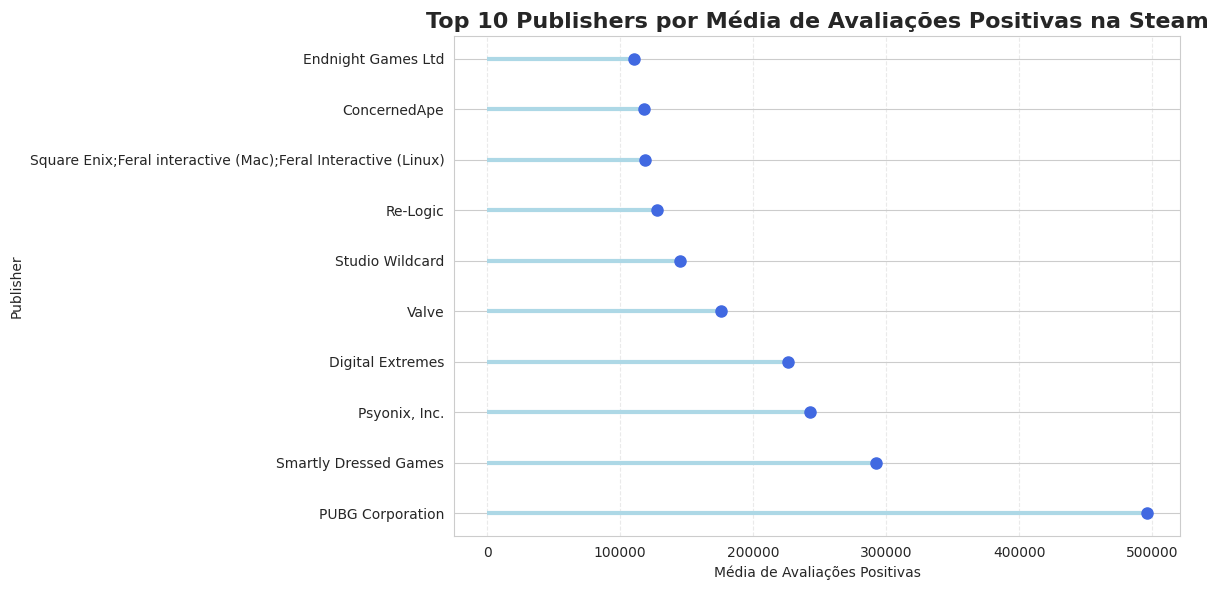

In [ ]:

# Garantir que não há publisher nulo
df = df[df['publisher'].notnull()]

# Agrupar por publisher e calcular média de positive_ratings
publisher_ratings = df.groupby('publisher')['positive_ratings'].mean().reset_index()

# Ordenar do maior para o menor
publisher_ratings = publisher_ratings.sort_values('positive_ratings', ascending=False)

# Pegar o Top 10
top10_publishers = publisher_ratings.head(10)

# Lollipop Chart com média de avaliações positivas
plt.figure(figsize=(12, 6))
plt.hlines(y=top10_publishers['publisher'], xmin=0, xmax=top10_publishers['positive_ratings'], color='lightblue', linewidth=3)
plt.plot(top10_publishers['positive_ratings'], top10_publishers['publisher'], 'o', markersize=8, color='royalblue')

plt.title('Top 10 Publishers por Média de Avaliações Positivas na Steam', fontsize=16, weight='bold')
plt.xlabel('Média de Avaliações Positivas')
plt.ylabel('Publisher')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Quais editoras têm os jogos mais bem avaliados?

Não da para levar muito em consideração pois no código esta agrupando por média

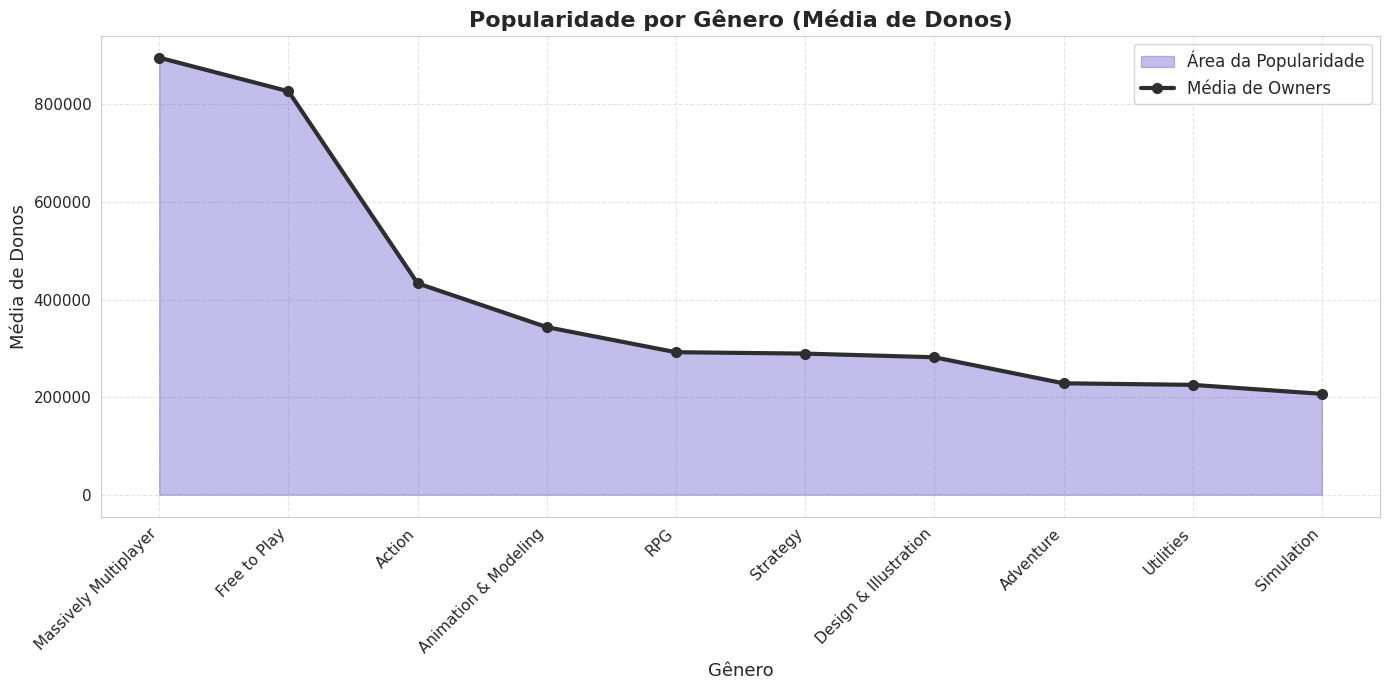

In [ ]:

# Gráfico de área com linha estilizada
plt.figure(figsize=(14, 7))

# Área preenchida
plt.fill_between(
    x=genre_popularity['genre_list'],
    y1=genre_popularity['owners'],
    color='#6A5ACD',
    alpha=0.4,
    label='Área da Popularidade'
)

# Linha de tendência
plt.plot(
    genre_popularity['genre_list'],
    genre_popularity['owners'],
    color='#2E2E2E',
    linewidth=3,
    marker='o',
    markersize=7,
    label='Média de Owners'
)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.title('Popularidade por Gênero (Média de Donos)', fontsize=16, weight='bold')
plt.xlabel('Gênero', fontsize=13)
plt.ylabel('Média de Donos', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Quais gêneros de jogos são mais populares na Steam?

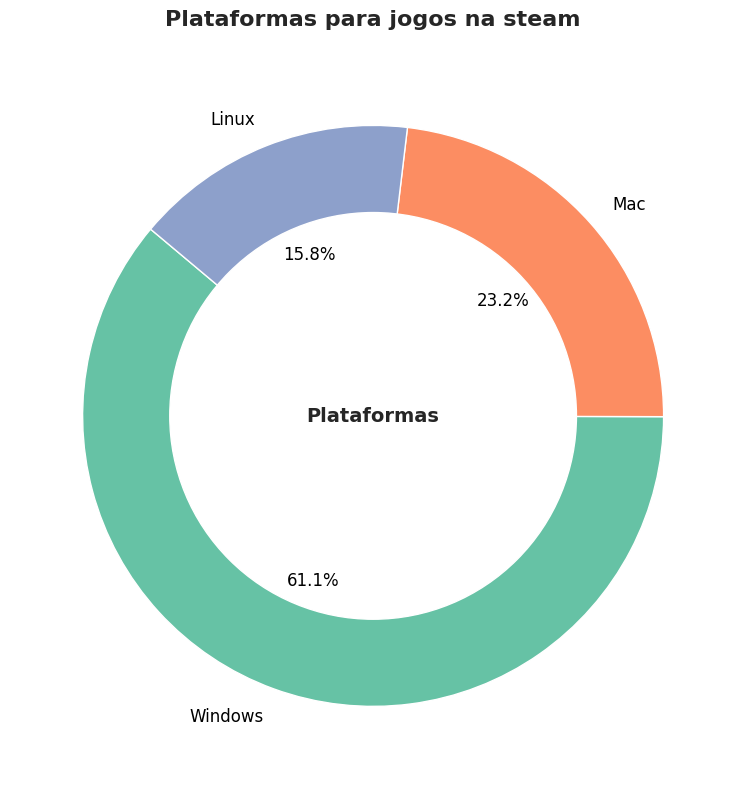

In [ ]:

# Separar plataformas e contar frequência
df['platforms_clean'] = df['platforms'].fillna('').str.lower()
platform_series = df['platforms_clean'].str.split(';')
all_platforms = platform_series.explode().value_counts()

# Cores personalizadas
colors = ['#66c2a5', '#fc8d62', '#8da0cb']


fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
wedges, texts, autotexts = ax.pie(
    all_platforms,
    labels=all_platforms.index.str.capitalize(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='white'),
    textprops=dict(color="black", fontsize=12)
)

# Círculo interno
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Texto central
plt.text(0, 0, 'Plataformas', ha='center', va='center', fontsize=14, fontweight='bold')

# Título
plt.title('Plataformas para jogos na steam', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


Quais plataformas são mais comuns na Steam?

Existe uma relação entre o preço de um jogo e sua popularidade na Steam?

In [ ]:

# Filtrar jogos pagos
df_paid = df[df['price'] > 0]

# Gráfico de dispersão interativo
fig = px.scatter(
    df_paid,
    x='price',
    y='middle_owners',
    opacity=0.5,
    color_discrete_sequence=['#1f77b4'],
    labels={
        'price': 'Preço (USD)',
        'middle_owners': 'Média de Donos'
    },
    title='Preço vs. Popularidade dos Jogos'
)

fig.update_layout(
    template='plotly_white',
    title_font_size=20,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    height=600,
    width=900
)

fig.show()


Como a popularidade dos principais gêneros de jogos mudou ao longo dos anos na Steam?

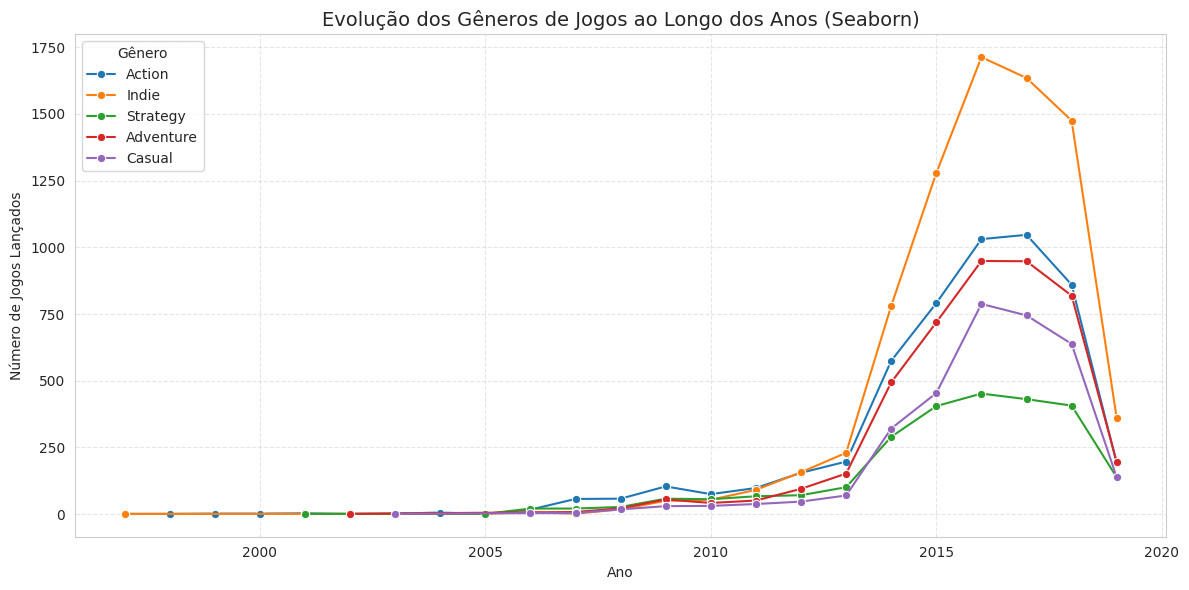

In [ ]:

# Converter release_date e extrair ano
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

# Explodir os gêneros
df['genre_list'] = df['genres'].fillna('').str.split(';')
df_genres_year = df.explode('genre_list')

# Contar jogos por ano e gênero
genre_trends = df_genres_year.groupby(['release_year', 'genre_list']).size().reset_index(name='count')

# 5 gêneros mais comuns
top_genres = genre_trends.groupby('genre_list')['count'].sum().sort_values(ascending=False).head(5).index
filtered_trends = genre_trends[genre_trends['genre_list'].isin(top_genres)]

# Gráfico com seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_trends, x='release_year', y='count', hue='genre_list', marker='o', palette='tab10')

plt.title('Evolução dos Gêneros de Jogos ao Longo dos Anos (Seaborn)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Número de Jogos Lançados')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()
